In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, ReLU, BatchNormalization
from tensorflow.keras.models import Model

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
image_path = 'test.png'

In [ ]:
def load_and_preprocess_image(image_path):
    # Load image using OpenCV
    img = cv2.imread(image_path)

    # Convert BGR to RGB (OpenCV loads in BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image if needed (resize to smaller size to save computation)
    img = cv2.resize(img, (256, 128))  # Resize to 256x128, keeping aspect ratio

    # Normalize the image to [0, 1] range
    img = img.astype('float32') / 255.0
    
    return img


In [2]:
def build_autoencoder(input_shape):
    inputs = Input(shape=input_shape)

    # Encoder
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Decoder
    x = Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Output layer to reconstruct the image
    outputs = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Build model
    model = Model(inputs, outputs)
    
    return model

In [3]:
image_path = 'data.png'  # Path to your uploaded image
input_img = load_and_preprocess_image(image_path)

# Expand dimensions to make it batch-like (add batch size dimension)
input_img = np.expand_dims(input_img, axis=0)

# Define input shape for the model
input_shape = input_img.shape[1:]

# Build and compile the autoencoder
autoencoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the single image (for illustration purposes)
autoencoder.fit(input_img, input_img, epochs=100, verbose=1)

# Predict (generate) a new image
generated_image = autoencoder.predict(input_img)

# Remove the batch dimension and plot the result
generated_image = np.squeeze(generated_image)

NameError: name 'load_and_preprocess_image' is not defined

NameError: name 'input_img' is not defined

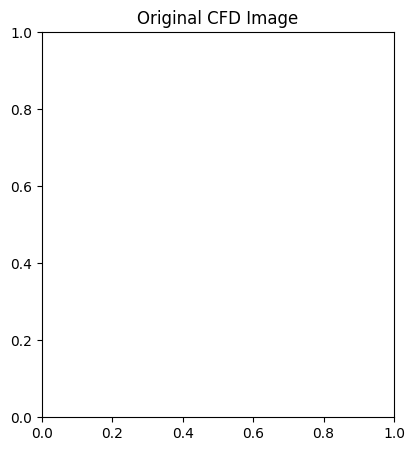

In [4]:
# Plot original and generated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original CFD Image')
plt.imshow(np.squeeze(input_img))

plt.subplot(1, 2, 2)
plt.title('Generated CFD Image')
plt.imshow(generated_image)

plt.show()